Step 1: Choose number of K clusters
Step 2: Select at random K points, the centroids (not necessarily from your dataset)
Step 3: Assign each data point to the closest centroid -> That forms K clusters
Step 4: Compute and place the new centroid of each cluster
Step 5: Reassign each data point to the new closest centroid. If any reassignment took place, go to step 4, else finish   

Note: Sometimes select K random points to be a centroids can be a trap and solution to that issue is k-Means++ algo:
        
        

#Choosing the right number of clusters

WCSS (Within cluster sum of squares) = SUM (Pi, C1)^2 + SUM (Pi, C2)^2 + SUM (Pi, C3)^2
    Pi = Point within each custer, C1, C2, C3 = centroids of 3 different clusters
    
Goal is to minimize WCSS

but WCSS will constantly decrease and will go to zero when we make number of clusters = number of data points in our dataset

So how to we find the optimal value of number of clusters:
For first few clusters made, the WCSS will drop substancially. And then WCSS drops but the percentage drop is very less. We have to choose that number till when WCSS drops big

For that we use Elbow Method.. It is a visual graph, and find the elbow in the chart.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
Kmeans_data = pd.read_csv('K-means_data.csv')
Kmeans_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [14]:
#Goal - segment customers based on their income and spending score
X = Kmeans_data.iloc[:,[3,4]].values

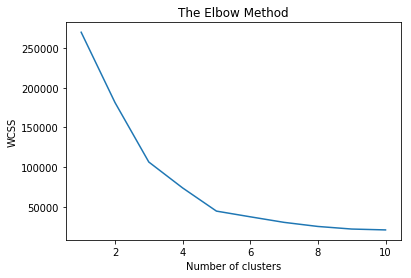

In [22]:
#Using elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
    #init can be random as well, but to avoid trap, we use k-means++
    #max_iter = maximum number of iterations to define final clusters
    #n_init = number of time kmeans algorithm will run with different centroids
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
    

In [16]:
#hence we can see the elbow is at 5. hence 5 number of clusters

In [23]:
#Applying k-means 
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X) #for each X it will predict its cluster

In [24]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

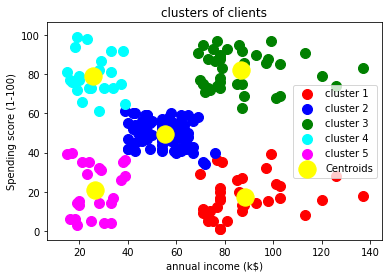

In [25]:
#Visualizing the clusters
plt.scatter(X[y_kmeans ==0, 0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'cluster 1') # s is size 
#we want the first cluster and hence we specify kmeans = 0 and we choose the first column of X as x co-ordinate, 
#similary for our 2nd argument we choose 2nd column of X as y coordinate
plt.scatter(X[y_kmeans ==1, 0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(X[y_kmeans ==2, 0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'cluster 3')
plt.scatter(X[y_kmeans ==3, 0], X[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X[y_kmeans ==4, 0], X[y_kmeans == 4,1], s = 100, c = 'magenta', label = 'cluster 5')

#To plot the centroids - same as the on - user cluster center attriute - that return coordinate of centroids 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('clusters of clients')
plt.xlabel('annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()


#Observations:
Cluster 1: Clients in cluster 1 have high income and low spending score
Cluster 2: Average income and average spending score
Cluster 3: high income and high spending score - target
cluster 4: low income and high spending score
cluster 5: low income and low spending score